## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2
from keras.layers import Dropout, BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.1, l2_ratio=0.1, drp_rate=0.1):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_unit,
                                   activation="relu",
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_rate)(x)
        else:
            x = keras.layers.Dense(units=n_unit,
                                   activation="relu",
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_rate)(x)
    out = keras.layers.Dense(units=output_units, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])    
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
Dropout_EXP = [0.1, 0.2, 0.4]
l1_exp = [1e-2, 1e-4, 1e-8]
l2_exp = [1e-2, 1e-4, 1e-8]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    for drp_rate in Dropout_EXP:
        for l1_ratio in l1_exp:
            for l2_ratio in l2_exp:
                model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1_ratio, l2_ratio=l2_ratio, drp_rate=drp_rate)
                opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM)
                model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
                model.fit(x_train, y_train,
                          epochs=EPOCHS,
                          batch_size=batch_size,
                          validation_data=[x_test, y_test],
                          shuffle=True)
                train_loss = model.history.history["loss"]
                valid_loss = model.history.history["val_loss"]
                train_acc = model.history.history["accuracy"]
                valid_acc = model.history.history["val_accuracy"]

                exp_name_tag = "exp-bn-%s-drp-%s-l1-%s-l2-%s" % (str(batch_size), str(drp_rate), str(l1_ratio), str(l2_ratio))
                results[exp_name_tag] = {'train-loss': train_loss,
                                         'valid-loss': valid_loss,
                                         'train-acc': train_acc,
                                         'valid-acc': valid_acc}


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1562/1563 [============================>.] - ETA: 0s - loss: 32.6066 - accuracy: 0.2375WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002172CED08B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=

1563/1563 [==============================] - 53s 34ms/step - loss: 2.9934 - accuracy: 0.2469 - val_loss: 0.7567 - val_accuracy: 0.0000e+00
Epoch 43/50
1563/1563 [==============================] - 55s 35ms/step - loss: 2.9369 - accuracy: 0.2504 - val_loss: 0.8421 - val_accuracy: 0.0000e+00
Epoch 44/50
1563/1563 [==============================] - 50s 32ms/step - loss: 2.9938 - accuracy: 0.2477 - val_loss: 1.0211 - val_accuracy: 0.0000e+00
Epoch 45/50
1563/1563 [==============================] - 49s 31ms/step - loss: 2.9861 - accuracy: 0.2478 - val_loss: 0.9674 - val_accuracy: 0.0000e+00
Epoch 46/50
1563/1563 [==============================] - 48s 31ms/step - loss: 2.9909 - accuracy: 0.2425 - val_loss: 1.0012 - val_accuracy: 0.0000e+00
Epoch 47/50
1563/1563 [==============================] - 49s 31ms/step - loss: 2.9568 - accuracy: 0.2485 - val_loss: 0.9918 - val_accuracy: 0.0000e+00
Epoch 48/50
1563/1563 [==============================] - 53s 34ms/step - loss: 2.9674 - accuracy: 0.2487 -

1563/1563 [==============================] - 44s 28ms/step - loss: 3.0798 - accuracy: 0.2495 - val_loss: 0.9949 - val_accuracy: 0.0000e+00
Epoch 34/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.0779 - accuracy: 0.2511 - val_loss: 1.0327 - val_accuracy: 0.0000e+00
Epoch 35/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.0722 - accuracy: 0.2498 - val_loss: 0.9828 - val_accuracy: 0.0000e+00
Epoch 36/50
1563/1563 [==============================] - 46s 29ms/step - loss: 3.0081 - accuracy: 0.2502 - val_loss: 1.1442 - val_accuracy: 0.0000e+00
Epoch 37/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.0607 - accuracy: 0.2502 - val_loss: 0.9815 - val_accuracy: 0.0000e+00
Epoch 38/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.0436 - accuracy: 0.2536 - val_loss: 1.0016 - val_accuracy: 0.0000e+00
Epoch 39/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.0960 - accuracy: 0.2478 -

1563/1563 [==============================] - 44s 28ms/step - loss: 3.1900 - accuracy: 0.2454 - val_loss: 1.0986 - val_accuracy: 0.0000e+00
Epoch 25/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.2098 - accuracy: 0.2476 - val_loss: 1.2768 - val_accuracy: 0.0000e+00
Epoch 26/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.1952 - accuracy: 0.2476 - val_loss: 1.1829 - val_accuracy: 0.0000e+00
Epoch 27/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.1617 - accuracy: 0.2478 - val_loss: 1.1512 - val_accuracy: 0.0000e+00
Epoch 28/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.0858 - accuracy: 0.2521 - val_loss: 1.0313 - val_accuracy: 0.0000e+00
Epoch 29/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.1248 - accuracy: 0.2511 - val_loss: 1.0168 - val_accuracy: 0.0000e+00
Epoch 30/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.1076 - accuracy: 0.2480 -

1563/1563 [==============================] - 45s 29ms/step - loss: 1.9334 - accuracy: 0.3933 - val_loss: 0.2427 - val_accuracy: 0.0000e+00
Epoch 16/50
1563/1563 [==============================] - 46s 30ms/step - loss: 1.9238 - accuracy: 0.3959 - val_loss: 0.2426 - val_accuracy: 0.0000e+00
Epoch 17/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.9551 - accuracy: 0.3883 - val_loss: 0.2435 - val_accuracy: 0.0000e+00
Epoch 18/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.9365 - accuracy: 0.3937 - val_loss: 0.2415 - val_accuracy: 0.0000e+00
Epoch 19/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.9155 - accuracy: 0.3964 - val_loss: 0.2387 - val_accuracy: 0.0000e+00
Epoch 20/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.9398 - accuracy: 0.3927 - val_loss: 0.2457 - val_accuracy: 0.0000e+00
Epoch 21/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.9299 - accuracy: 0.3934 -

1563/1563 [==============================] - 45s 29ms/step - loss: 3.2560 - accuracy: 0.4502 - val_loss: 1.5652 - val_accuracy: 0.0000e+00
Epoch 7/50
1563/1563 [==============================] - 44s 28ms/step - loss: 2.9630 - accuracy: 0.4508 - val_loss: 1.2946 - val_accuracy: 0.0000e+00
Epoch 8/50
1563/1563 [==============================] - 44s 28ms/step - loss: 2.7201 - accuracy: 0.4475 - val_loss: 1.0640 - val_accuracy: 0.0000e+00
Epoch 9/50
1563/1563 [==============================] - 45s 28ms/step - loss: 2.5261 - accuracy: 0.4440 - val_loss: 0.8776 - val_accuracy: 0.0000e+00
Epoch 10/50
1563/1563 [==============================] - 44s 28ms/step - loss: 2.3290 - accuracy: 0.4547 - val_loss: 0.7214 - val_accuracy: 0.0000e+00
Epoch 11/50
1563/1563 [==============================] - 44s 28ms/step - loss: 2.1824 - accuracy: 0.4607 - val_loss: 0.6067 - val_accuracy: 0.0000e+00
Epoch 12/50
1563/1563 [==============================] - 44s 28ms/step - loss: 2.0767 - accuracy: 0.4617 - va

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 48s 30ms/step - loss: 5.5914 - accuracy: 0.3576 - val_loss: 3.5163 - val_accuracy: 0.0000e+00
Epoch 2/50
1563/1563 [==============================] - 46s 30ms/step - loss: 4.9104 - accuracy: 0.4185 - val_loss: 3.0558 - val_accuracy: 0.0000e+00
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 4.4226 - accuracy: 0.4343 - val_loss: 2.6328 - val_accuracy: 0.0000e+00
Epoch 4/50
1563/1563 [==============================] - 47s 30ms/step - loss: 3.9968 - accuracy: 0.4429 - val_loss: 2.2488 - val_accuracy: 0.0000e+00
Epoch 5/50
1563/1563 [==============================] - 46s 30ms/step - loss: 3.6419 - accuracy: 0.4

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - ETA: 0s - loss: 9.9931 - accuracy: 0.3538WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021737B14798> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

1563/1563 [==============================] - 45s 28ms/step - loss: 1.8046 - accuracy: 0.4133 - val_loss: 0.1599 - val_accuracy: 0.0000e+00
Epoch 46/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8125 - accuracy: 0.4080 - val_loss: 0.1601 - val_accuracy: 0.0000e+00
Epoch 47/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8089 - accuracy: 0.4110 - val_loss: 0.1564 - val_accuracy: 0.0000e+00
Epoch 48/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7965 - accuracy: 0.4126 - val_loss: 0.1552 - val_accuracy: 0.0000e+00
Epoch 49/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7936 - accuracy: 0.4133 - val_loss: 0.1542 - val_accuracy: 0.0000e+00
Epoch 50/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7916 - accuracy: 0.4168 - val_loss: 0.1561 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Lin

1563/1563 [==============================] - 45s 29ms/step - loss: 1.3681 - accuracy: 0.5537 - val_loss: 0.1194 - val_accuracy: 0.0000e+00
Epoch 37/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3656 - accuracy: 0.5553 - val_loss: 0.1189 - val_accuracy: 0.0000e+00
Epoch 38/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3589 - accuracy: 0.5594 - val_loss: 0.1184 - val_accuracy: 0.0000e+00
Epoch 39/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3591 - accuracy: 0.5554 - val_loss: 0.1180 - val_accuracy: 0.0000e+00
Epoch 40/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3582 - accuracy: 0.5589 - val_loss: 0.1175 - val_accuracy: 0.0000e+00
Epoch 41/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.3453 - accuracy: 0.5608 - val_loss: 0.1171 - val_accuracy: 0.0000e+00
Epoch 42/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.3492 - accuracy: 0.5613 -

Epoch 27/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2983 - accuracy: 0.5380 - val_loss: 4.4226e-04 - val_accuracy: 0.0000e+00
Epoch 28/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2896 - accuracy: 0.5418 - val_loss: 4.4308e-04 - val_accuracy: 0.0000e+00
Epoch 29/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2782 - accuracy: 0.5446 - val_loss: 4.4383e-04 - val_accuracy: 0.0000e+00
Epoch 30/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2769 - accuracy: 0.5449 - val_loss: 4.4463e-04 - val_accuracy: 0.0000e+00
Epoch 31/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2738 - accuracy: 0.5468 - val_loss: 4.4535e-04 - val_accuracy: 0.0000e+00
Epoch 32/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2636 - accuracy: 0.5493 - val_loss: 4.4610e-04 - val_accuracy: 0.0000e+00
Epoch 33/50
1563/1563 [==============================] - 45s 29ms/step

1563/1563 [==============================] - 44s 28ms/step - loss: 3.3803 - accuracy: 0.2356 - val_loss: 1.3629 - val_accuracy: 0.0000e+00
Epoch 18/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.4142 - accuracy: 0.2376 - val_loss: 1.1828 - val_accuracy: 0.0000e+00
Epoch 19/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.3620 - accuracy: 0.2384 - val_loss: 1.1887 - val_accuracy: 0.0000e+00
Epoch 20/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.3525 - accuracy: 0.2382 - val_loss: 1.3110 - val_accuracy: 0.0000e+00
Epoch 21/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.3927 - accuracy: 0.2364 - val_loss: 1.3632 - val_accuracy: 0.0000e+00
Epoch 22/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.3480 - accuracy: 0.2360 - val_loss: 1.2270 - val_accuracy: 0.0000e+00
Epoch 23/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.3404 - accuracy: 0.2346 -

1563/1563 [==============================] - 44s 28ms/step - loss: 3.5830 - accuracy: 0.2375 - val_loss: 1.7871 - val_accuracy: 0.0000e+00
Epoch 9/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.5490 - accuracy: 0.2356 - val_loss: 1.7093 - val_accuracy: 0.0000e+00
Epoch 10/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.5304 - accuracy: 0.2425 - val_loss: 1.3125 - val_accuracy: 0.0000e+00
Epoch 11/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.4773 - accuracy: 0.2384 - val_loss: 1.4562 - val_accuracy: 0.0000e+00
Epoch 12/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.5007 - accuracy: 0.2394 - val_loss: 1.3554 - val_accuracy: 0.0000e+00
Epoch 13/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.4425 - accuracy: 0.2371 - val_loss: 1.2123 - val_accuracy: 0.0000e+00
Epoch 14/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.3784 - accuracy: 0.2387 - 

1563/1563 [==============================] - 49s 32ms/step - loss: 33.8104 - accuracy: 0.2231 - val_loss: 2.6546 - val_accuracy: 0.0000e+00
Epoch 2/50
1563/1563 [==============================] - 48s 30ms/step - loss: 4.1185 - accuracy: 0.2380 - val_loss: 1.6602 - val_accuracy: 0.0000e+00
Epoch 3/50
1563/1563 [==============================] - 48s 30ms/step - loss: 3.7634 - accuracy: 0.2370 - val_loss: 1.6786 - val_accuracy: 0.0000e+00
Epoch 4/50
1563/1563 [==============================] - 48s 31ms/step - loss: 3.6140 - accuracy: 0.2385 - val_loss: 1.4063 - val_accuracy: 0.0000e+00
Epoch 5/50
1563/1563 [==============================] - 49s 31ms/step - loss: 3.5642 - accuracy: 0.2395 - val_loss: 1.3917 - val_accuracy: 0.0000e+00
Epoch 6/50
1563/1563 [==============================] - 53s 34ms/step - loss: 3.4941 - accuracy: 0.2375 - val_loss: 1.5348 - val_accuracy: 0.0000e+00
Epoch 7/50
1563/1563 [==============================] - 50s 32ms/step - loss: 3.5006 - accuracy: 0.2372 - val_

1563/1563 [==============================] - ETA: 0s - loss: 12.2559 - accuracy: 0.3252WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021730AA2168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 48s 31ms/step - loss: 12.2559 - accuracy: 0.3252 - val_loss: 5.0597 - val_accuracy: 0.0000e+0

1563/1563 [==============================] - 45s 29ms/step - loss: 1.9945 - accuracy: 0.3709 - val_loss: 0.2469 - val_accuracy: 0.0000e+00
Epoch 49/50
1563/1563 [==============================] - 45s 29ms/step - loss: 2.0042 - accuracy: 0.3696 - val_loss: 0.2464 - val_accuracy: 0.0000e+00
Epoch 50/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.9799 - accuracy: 0.3729 - val_loss: 0.2423 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warn

1563/1563 [==============================] - 45s 29ms/step - loss: 1.8301 - accuracy: 0.4346 - val_loss: 0.2465 - val_accuracy: 0.0000e+00
Epoch 40/50
1563/1563 [==============================] - 45s 28ms/step - loss: 1.8118 - accuracy: 0.4428 - val_loss: 0.2475 - val_accuracy: 0.0000e+00
Epoch 41/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8047 - accuracy: 0.4424 - val_loss: 0.2448 - val_accuracy: 0.0000e+00
Epoch 42/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8114 - accuracy: 0.4397 - val_loss: 0.2456 - val_accuracy: 0.0000e+00
Epoch 43/50
1563/1563 [==============================] - 48s 30ms/step - loss: 1.8151 - accuracy: 0.4387 - val_loss: 0.2462 - val_accuracy: 0.0000e+00
Epoch 44/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.7966 - accuracy: 0.4478 - val_loss: 0.2468 - val_accuracy: 0.0000e+00
Epoch 45/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8140 - accuracy: 0.4396 -

1563/1563 [==============================] - 45s 29ms/step - loss: 1.8283 - accuracy: 0.4367 - val_loss: 0.2527 - val_accuracy: 0.0000e+00
Epoch 31/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7979 - accuracy: 0.4483 - val_loss: 0.2453 - val_accuracy: 0.0000e+00
Epoch 32/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8078 - accuracy: 0.4434 - val_loss: 0.2485 - val_accuracy: 0.0000e+00
Epoch 33/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8049 - accuracy: 0.4436 - val_loss: 0.2484 - val_accuracy: 0.0000e+00
Epoch 34/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7968 - accuracy: 0.4461 - val_loss: 0.2478 - val_accuracy: 0.0000e+00
Epoch 35/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8079 - accuracy: 0.4437 - val_loss: 0.2532 - val_accuracy: 0.0000e+00
Epoch 36/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8161 - accuracy: 0.4396 -

1563/1563 [==============================] - 46s 30ms/step - loss: 1.8924 - accuracy: 0.3686 - val_loss: 0.1359 - val_accuracy: 0.0000e+00
Epoch 22/50
1563/1563 [==============================] - 46s 30ms/step - loss: 1.8752 - accuracy: 0.3752 - val_loss: 0.1354 - val_accuracy: 0.0000e+00
Epoch 23/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.9065 - accuracy: 0.3604 - val_loss: 0.1347 - val_accuracy: 0.0000e+00
Epoch 24/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8805 - accuracy: 0.3675 - val_loss: 0.1270 - val_accuracy: 0.0000e+00
Epoch 25/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8631 - accuracy: 0.3768 - val_loss: 0.1268 - val_accuracy: 0.0000e+00
Epoch 26/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8767 - accuracy: 0.3741 - val_loss: 0.1302 - val_accuracy: 0.0000e+00
Epoch 27/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8740 - accuracy: 0.3723 -

1563/1563 [==============================] - 48s 31ms/step - loss: 1.6769 - accuracy: 0.4495 - val_loss: 0.1330 - val_accuracy: 0.0000e+00
Epoch 12/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6688 - accuracy: 0.4539 - val_loss: 0.1322 - val_accuracy: 0.0000e+00
Epoch 13/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6621 - accuracy: 0.4539 - val_loss: 0.1314 - val_accuracy: 0.0000e+00
Epoch 14/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6677 - accuracy: 0.4535 - val_loss: 0.1306 - val_accuracy: 0.0000e+00
Epoch 15/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6598 - accuracy: 0.4549 - val_loss: 0.1297 - val_accuracy: 0.0000e+00
Epoch 16/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6472 - accuracy: 0.4572 - val_loss: 0.1289 - val_accuracy: 0.0000e+00
Epoch 17/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6439 - accuracy: 0.4623 -

1563/1563 [==============================] - 47s 30ms/step - loss: 1.6960 - accuracy: 0.3920 - val_loss: 4.1801e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6442 - accuracy: 0.4116 - val_loss: 4.1907e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6053 - accuracy: 0.4252 - val_loss: 4.2006e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5877 - accuracy: 0.4333 - val_loss: 4.2102e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5722 - accuracy: 0.4421 - val_loss: 4.2201e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5683 - accuracy: 0.4405 - val_loss: 4.2302e-04 - val_accuracy: 0.0000e+00
Epoch 8/50
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5725 - 

1563/1563 [==============================] - ETA: 0s - loss: 34.1393 - accuracy: 0.2075- ETA: 0s - loss: 34.6267 - accWARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002173A97B558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 48s 31ms/step - loss: 34.1393 - accuracy: 0.2075 - val_loss: 2

1563/1563 [==============================] - 44s 28ms/step - loss: 3.4654 - accuracy: 0.2170 - val_loss: 1.3913 - val_accuracy: 0.0000e+00
Epoch 49/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.4779 - accuracy: 0.2198 - val_loss: 1.4412 - val_accuracy: 0.0000e+00
Epoch 50/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.4845 - accuracy: 0.2200 - val_loss: 1.4327 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warn

1563/1563 [==============================] - 45s 29ms/step - loss: 3.6118 - accuracy: 0.2241 - val_loss: 1.4083 - val_accuracy: 0.0000e+00
Epoch 40/50
1563/1563 [==============================] - 44s 28ms/step - loss: 3.5879 - accuracy: 0.2224 - val_loss: 1.4788 - val_accuracy: 0.0000e+00
Epoch 41/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.5807 - accuracy: 0.2191 - val_loss: 1.3791 - val_accuracy: 0.0000e+00
Epoch 42/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.5826 - accuracy: 0.2208 - val_loss: 1.5264 - val_accuracy: 0.0000e+00
Epoch 43/50
1563/1563 [==============================] - 46s 29ms/step - loss: 3.6097 - accuracy: 0.2180 - val_loss: 1.4379 - val_accuracy: 0.0000e+00
Epoch 44/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.5643 - accuracy: 0.2205 - val_loss: 1.4363 - val_accuracy: 0.0000e+00
Epoch 45/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.6133 - accuracy: 0.2229 -

1563/1563 [==============================] - 45s 29ms/step - loss: 3.6651 - accuracy: 0.2170 - val_loss: 1.7066 - val_accuracy: 0.0000e+00
Epoch 31/50
1563/1563 [==============================] - 46s 29ms/step - loss: 3.6395 - accuracy: 0.2211 - val_loss: 1.5760 - val_accuracy: 0.0000e+00
Epoch 32/50
1563/1563 [==============================] - 46s 29ms/step - loss: 3.6443 - accuracy: 0.2179 - val_loss: 1.5766 - val_accuracy: 0.0000e+00
Epoch 33/50
1563/1563 [==============================] - 46s 30ms/step - loss: 3.6248 - accuracy: 0.2187 - val_loss: 1.6873 - val_accuracy: 0.0000e+00
Epoch 34/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.6115 - accuracy: 0.2195 - val_loss: 1.5431 - val_accuracy: 0.0000e+00
Epoch 35/50
1563/1563 [==============================] - 45s 29ms/step - loss: 3.6329 - accuracy: 0.2172 - val_loss: 1.6239 - val_accuracy: 0.0000e+00
Epoch 36/50
1563/1563 [==============================] - 46s 29ms/step - loss: 3.6104 - accuracy: 0.2196 -

1563/1563 [==============================] - 47s 30ms/step - loss: 2.1013 - accuracy: 0.3232 - val_loss: 0.2250 - val_accuracy: 0.0000e+00
Epoch 22/50
1563/1563 [==============================] - 45s 29ms/step - loss: 2.1082 - accuracy: 0.3146 - val_loss: 0.2222 - val_accuracy: 0.0000e+00
Epoch 23/50
1563/1563 [==============================] - 45s 29ms/step - loss: 2.1074 - accuracy: 0.3165 - val_loss: 0.2215 - val_accuracy: 0.0000e+00
Epoch 24/50
1563/1563 [==============================] - 45s 29ms/step - loss: 2.0883 - accuracy: 0.3223 - val_loss: 0.2235 - val_accuracy: 0.0000e+00
Epoch 25/50
1563/1563 [==============================] - 45s 29ms/step - loss: 2.1006 - accuracy: 0.3161 - val_loss: 0.2241 - val_accuracy: 0.0000e+00
Epoch 26/50
1563/1563 [==============================] - 45s 29ms/step - loss: 2.0897 - accuracy: 0.3262 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 27/50
1563/1563 [==============================] - 45s 29ms/step - loss: 2.0951 - accuracy: 0.3242 -

1563/1563 [==============================] - 45s 29ms/step - loss: 2.2830 - accuracy: 0.3604 - val_loss: 0.4606 - val_accuracy: 0.0000e+00
Epoch 13/50
1563/1563 [==============================] - 46s 29ms/step - loss: 2.2206 - accuracy: 0.3581 - val_loss: 0.4125 - val_accuracy: 0.0000e+00
Epoch 14/50
1563/1563 [==============================] - 46s 30ms/step - loss: 2.1843 - accuracy: 0.3532 - val_loss: 0.3784 - val_accuracy: 0.0000e+00
Epoch 15/50
1563/1563 [==============================] - 46s 29ms/step - loss: 2.1765 - accuracy: 0.3455 - val_loss: 0.3588 - val_accuracy: 0.0000e+00
Epoch 16/50
1563/1563 [==============================] - 46s 30ms/step - loss: 2.1633 - accuracy: 0.3485 - val_loss: 0.3450 - val_accuracy: 0.0000e+00
Epoch 17/50
1563/1563 [==============================] - 46s 29ms/step - loss: 2.1398 - accuracy: 0.3505 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 18/50
1563/1563 [==============================] - 46s 30ms/step - loss: 2.1388 - accuracy: 0.3474 -

1563/1563 [==============================] - 47s 30ms/step - loss: 4.6399 - accuracy: 0.3503 - val_loss: 2.6285 - val_accuracy: 0.0000e+00
Epoch 4/50
1563/1563 [==============================] - 47s 30ms/step - loss: 4.2350 - accuracy: 0.3506 - val_loss: 2.2428 - val_accuracy: 0.0000e+00
Epoch 5/50
1563/1563 [==============================] - 48s 31ms/step - loss: 3.8686 - accuracy: 0.3492 - val_loss: 1.8923 - val_accuracy: 0.0000e+00
Epoch 6/50
1563/1563 [==============================] - 47s 30ms/step - loss: 3.5506 - accuracy: 0.3445 - val_loss: 1.5824 - val_accuracy: 0.0000e+00
Epoch 7/50
1563/1563 [==============================] - 48s 31ms/step - loss: 3.2621 - accuracy: 0.3432 - val_loss: 1.3057 - val_accuracy: 0.0000e+00
Epoch 8/50
1563/1563 [==============================] - 47s 30ms/step - loss: 2.9907 - accuracy: 0.3509 - val_loss: 1.0724 - val_accuracy: 0.0000e+00
Epoch 9/50
1563/1563 [==============================] - 47s 30ms/step - loss: 2.7851 - accuracy: 0.3496 - val_l

1563/1563 [==============================] - ETA: 0s - loss: 10.2537 - accuracy: 0.2815- ETA: 0s - loss: 10.3122 - accurWARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000217380FA048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 49s 31ms/step - loss: 10.2537 - accuracy: 0.2815 - val_loss:

1563/1563 [==============================] - 70s 45ms/step - loss: 1.9785 - accuracy: 0.3263 - val_loss: 0.1216 - val_accuracy: 0.0000e+00
Epoch 49/50
1563/1563 [==============================] - 57s 36ms/step - loss: 1.9638 - accuracy: 0.3350 - val_loss: 0.1241 - val_accuracy: 0.0000e+00
Epoch 50/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.9795 - accuracy: 0.3336 - val_loss: 0.1236 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warn

1563/1563 [==============================] - 66s 42ms/step - loss: 1.7579 - accuracy: 0.4105 - val_loss: 0.1038 - val_accuracy: 0.0000e+00
Epoch 40/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7699 - accuracy: 0.4051 - val_loss: 0.1029 - val_accuracy: 0.0000e+00
Epoch 41/50
1563/1563 [==============================] - 60s 38ms/step - loss: 1.7666 - accuracy: 0.4056 - val_loss: 0.1021 - val_accuracy: 0.0000e+00
Epoch 42/50
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7716 - accuracy: 0.4050 - val_loss: 0.1013 - val_accuracy: 0.0000e+00
Epoch 43/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.7646 - accuracy: 0.4049 - val_loss: 0.1005 - val_accuracy: 0.0000e+00
Epoch 44/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.7602 - accuracy: 0.4073 - val_loss: 0.0997 - val_accuracy: 0.0000e+00
Epoch 45/50
1563/1563 [==============================] - 73s 47ms/step - loss: 1.7656 - accuracy: 0.4080 -

1563/1563 [==============================] - 67s 43ms/step - loss: 1.7040 - accuracy: 0.3916 - val_loss: 4.3342e-04 - val_accuracy: 0.0000e+00
Epoch 30/50
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6906 - accuracy: 0.3975 - val_loss: 4.3380e-04 - val_accuracy: 0.0000e+00
Epoch 31/50
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6866 - accuracy: 0.3991 - val_loss: 4.3420e-04 - val_accuracy: 0.0000e+00
Epoch 32/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6761 - accuracy: 0.4018 - val_loss: 4.3458e-04 - val_accuracy: 0.0000e+00
Epoch 33/50
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6707 - accuracy: 0.4044 - val_loss: 4.3493e-04 - val_accuracy: 0.0000e+00
Epoch 34/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6721 - accuracy: 0.4032 - val_loss: 4.3529e-04 - val_accuracy: 0.0000e+00
Epoch 35/50
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6

391/391 [==============================] - 17s 44ms/step - loss: 2.8376 - accuracy: 0.2999 - val_loss: 0.9830 - val_accuracy: 0.0000e+00
Epoch 21/50
391/391 [==============================] - 17s 43ms/step - loss: 2.8406 - accuracy: 0.2978 - val_loss: 0.8998 - val_accuracy: 0.0000e+00
Epoch 22/50
391/391 [==============================] - 17s 43ms/step - loss: 2.9039 - accuracy: 0.2987 - val_loss: 0.9500 - val_accuracy: 0.0000e+00
Epoch 23/50
391/391 [==============================] - 17s 45ms/step - loss: 2.8677 - accuracy: 0.2969 - val_loss: 0.9499 - val_accuracy: 0.0000e+00
Epoch 24/50
391/391 [==============================] - 17s 43ms/step - loss: 2.8427 - accuracy: 0.2980 - val_loss: 0.9748 - val_accuracy: 0.0000e+00
Epoch 25/50
391/391 [==============================] - 17s 43ms/step - loss: 2.8505 - accuracy: 0.2978 - val_loss: 0.9275 - val_accuracy: 0.0000e+00
Epoch 26/50
391/391 [==============================] - 18s 46ms/step - loss: 2.8429 - accuracy: 0.3004 - val_loss: 0.8

391/391 [==============================] - 18s 45ms/step - loss: 2.9416 - accuracy: 0.3000 - val_loss: 0.9173 - val_accuracy: 0.0000e+00
Epoch 13/50
391/391 [==============================] - 18s 46ms/step - loss: 2.9086 - accuracy: 0.2973 - val_loss: 1.0025 - val_accuracy: 0.0000e+00
Epoch 14/50
391/391 [==============================] - 18s 46ms/step - loss: 2.8497 - accuracy: 0.3028 - val_loss: 0.9549 - val_accuracy: 0.0000e+00
Epoch 15/50
391/391 [==============================] - 20s 51ms/step - loss: 2.8651 - accuracy: 0.2998 - val_loss: 0.9512 - val_accuracy: 0.0000e+00
Epoch 16/50
391/391 [==============================] - 17s 44ms/step - loss: 2.8240 - accuracy: 0.3016 - val_loss: 0.8374 - val_accuracy: 0.0000e+00
Epoch 17/50
391/391 [==============================] - 18s 46ms/step - loss: 2.8244 - accuracy: 0.3010 - val_loss: 0.9270 - val_accuracy: 0.0000e+00
Epoch 18/50
391/391 [==============================] - 17s 43ms/step - loss: 2.8382 - accuracy: 0.2974 - val_loss: 0.9

Epoch 4/50
391/391 [==============================] - 21s 53ms/step - loss: 3.2413 - accuracy: 0.2984 - val_loss: 1.2327 - val_accuracy: 0.0000e+00
Epoch 5/50
391/391 [==============================] - 21s 54ms/step - loss: 3.1634 - accuracy: 0.2962 - val_loss: 1.2188 - val_accuracy: 0.0000e+00
Epoch 6/50
391/391 [==============================] - 21s 54ms/step - loss: 3.1193 - accuracy: 0.2936 - val_loss: 1.0691 - val_accuracy: 0.0000e+00
Epoch 7/50
391/391 [==============================] - 21s 52ms/step - loss: 3.0635 - accuracy: 0.2979 - val_loss: 1.1656 - val_accuracy: 0.0000e+00
Epoch 8/50
391/391 [==============================] - 20s 50ms/step - loss: 2.9730 - accuracy: 0.3006 - val_loss: 1.0396 - val_accuracy: 0.0000e+00
Epoch 9/50
391/391 [==============================] - 17s 44ms/step - loss: 2.9114 - accuracy: 0.3015 - val_loss: 0.9580 - val_accuracy: 0.0000e+00
Epoch 10/50
391/391 [==============================] - 17s 44ms/step - loss: 2.8914 - accuracy: 0.3045 - val_los

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - 18s 45ms/step - loss: 17.4787 - accuracy: 0.3439 - val_loss: 13.2111 - val_accuracy: 0.0000e+00
Epoch 2/50
391/391 [==============================] - 19s 48ms/step - loss: 12.9250 - accuracy: 0.4237 - val_loss: 9.5544 - val_accuracy: 0.0000e+00
Epoch 3/50
391/391 [==============================] - 19s 49ms/step - loss: 9.7006 - accuracy: 0.4543 - val_loss: 6.8967 - val_accuracy: 0.0000e+00
Epoch 4/50
391/391 [==============================] - 18s 46ms/step - loss: 7.3848 - accuracy: 0.4659 - val_loss: 4.9687 - val_accuracy: 0.0000e+00
Epoch 5/50
391/391 [==============================] - 18s 47ms/step - loss: 5.7142 - accuracy: 0.4732 - v

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
390/391 [============================>.] - ETA: 0s - loss: 5.9863 - accuracy: 0.3425WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002174AC97828> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attac

391/391 [==============================] - 19s 48ms/step - loss: 1.7778 - accuracy: 0.5705 - val_loss: 0.5613 - val_accuracy: 0.0000e+00
Epoch 47/50
391/391 [==============================] - 20s 51ms/step - loss: 1.7547 - accuracy: 0.5689 - val_loss: 0.5439 - val_accuracy: 0.0000e+00
Epoch 48/50
391/391 [==============================] - 19s 49ms/step - loss: 1.7274 - accuracy: 0.5746 - val_loss: 0.5271 - val_accuracy: 0.0000e+00
Epoch 49/50
391/391 [==============================] - 18s 47ms/step - loss: 1.7064 - accuracy: 0.5754 - val_loss: 0.5159 - val_accuracy: 0.0000e+00
Epoch 50/50
391/391 [==============================] - 19s 48ms/step - loss: 1.7052 - accuracy: 0.5720 - val_loss: 0.5043 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the f

391/391 [==============================] - 17s 45ms/step - loss: 2.0684 - accuracy: 0.5637 - val_loss: 0.8305 - val_accuracy: 0.0000e+00
Epoch 39/50
391/391 [==============================] - 17s 44ms/step - loss: 2.0387 - accuracy: 0.5630 - val_loss: 0.7977 - val_accuracy: 0.0000e+00
Epoch 40/50
391/391 [==============================] - 16s 42ms/step - loss: 2.0067 - accuracy: 0.5606 - val_loss: 0.7644 - val_accuracy: 0.0000e+00
Epoch 41/50
391/391 [==============================] - 18s 46ms/step - loss: 1.9658 - accuracy: 0.5642 - val_loss: 0.7355 - val_accuracy: 0.0000e+00
Epoch 42/50
391/391 [==============================] - 18s 46ms/step - loss: 1.9425 - accuracy: 0.5634 - val_loss: 0.7077 - val_accuracy: 0.0000e+00
Epoch 43/50
391/391 [==============================] - 17s 43ms/step - loss: 1.8999 - accuracy: 0.5691 - val_loss: 0.6791 - val_accuracy: 0.0000e+00
Epoch 44/50
391/391 [==============================] - 18s 45ms/step - loss: 1.8758 - accuracy: 0.5670 - val_loss: 0.6

391/391 [==============================] - 16s 42ms/step - loss: 1.5120 - accuracy: 0.5221 - val_loss: 0.1756 - val_accuracy: 0.0000e+00
Epoch 31/50
391/391 [==============================] - 17s 42ms/step - loss: 1.5033 - accuracy: 0.5275 - val_loss: 0.1745 - val_accuracy: 0.0000e+00
Epoch 32/50
391/391 [==============================] - 16s 41ms/step - loss: 1.4947 - accuracy: 0.5275 - val_loss: 0.1748 - val_accuracy: 0.0000e+00
Epoch 33/50
391/391 [==============================] - 16s 42ms/step - loss: 1.4854 - accuracy: 0.5309 - val_loss: 0.1753 - val_accuracy: 0.0000e+00
Epoch 34/50
391/391 [==============================] - 17s 44ms/step - loss: 1.4936 - accuracy: 0.5296 - val_loss: 0.1761 - val_accuracy: 0.0000e+00
Epoch 35/50
391/391 [==============================] - 16s 42ms/step - loss: 1.4814 - accuracy: 0.5337 - val_loss: 0.1751 - val_accuracy: 0.0000e+00
Epoch 36/50
391/391 [==============================] - 16s 42ms/step - loss: 1.4972 - accuracy: 0.5283 - val_loss: 0.1

391/391 [==============================] - 17s 43ms/step - loss: 1.3170 - accuracy: 0.5773 - val_loss: 0.1354 - val_accuracy: 0.0000e+00
Epoch 23/50
391/391 [==============================] - 17s 42ms/step - loss: 1.3117 - accuracy: 0.5788 - val_loss: 0.1352 - val_accuracy: 0.0000e+00
Epoch 24/50
391/391 [==============================] - 16s 42ms/step - loss: 1.2968 - accuracy: 0.5854 - val_loss: 0.1350 - val_accuracy: 0.0000e+00
Epoch 25/50
391/391 [==============================] - 16s 42ms/step - loss: 1.2881 - accuracy: 0.5902 - val_loss: 0.1349 - val_accuracy: 0.0000e+00
Epoch 26/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2865 - accuracy: 0.5896 - val_loss: 0.1347 - val_accuracy: 0.0000e+00
Epoch 27/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2793 - accuracy: 0.5924 - val_loss: 0.1346 - val_accuracy: 0.0000e+00
Epoch 28/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2697 - accuracy: 0.5950 - val_loss: 0.1

391/391 [==============================] - 18s 45ms/step - loss: 1.2710 - accuracy: 0.5466 - val_loss: 4.1690e-04 - val_accuracy: 0.0000e+00
Epoch 14/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2617 - accuracy: 0.5475 - val_loss: 4.1713e-04 - val_accuracy: 0.0000e+00
Epoch 15/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2413 - accuracy: 0.5574 - val_loss: 4.1733e-04 - val_accuracy: 0.0000e+00
Epoch 16/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2302 - accuracy: 0.5620 - val_loss: 4.1754e-04 - val_accuracy: 0.0000e+00
Epoch 17/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2154 - accuracy: 0.5685 - val_loss: 4.1776e-04 - val_accuracy: 0.0000e+00
Epoch 18/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2085 - accuracy: 0.5701 - val_loss: 4.1801e-04 - val_accuracy: 0.0000e+00
Epoch 19/50
391/391 [==============================] - 17s 43ms/step - loss: 1.2014 - accuracy

391/391 [==============================] - 17s 43ms/step - loss: 3.4053 - accuracy: 0.2830 - val_loss: 1.2878 - val_accuracy: 0.0000e+00
Epoch 5/50
391/391 [==============================] - 16s 42ms/step - loss: 3.2689 - accuracy: 0.2829 - val_loss: 1.1356 - val_accuracy: 0.0000e+00
Epoch 6/50
391/391 [==============================] - 17s 44ms/step - loss: 3.2015 - accuracy: 0.2809 - val_loss: 1.1931 - val_accuracy: 0.0000e+00
Epoch 7/50
391/391 [==============================] - 17s 43ms/step - loss: 3.1743 - accuracy: 0.2786 - val_loss: 1.2184 - val_accuracy: 0.0000e+00
Epoch 8/50
391/391 [==============================] - 17s 42ms/step - loss: 3.1472 - accuracy: 0.2814 - val_loss: 1.1574 - val_accuracy: 0.0000e+00
Epoch 9/50
391/391 [==============================] - 17s 43ms/step - loss: 3.1092 - accuracy: 0.2799 - val_loss: 1.0673 - val_accuracy: 0.0000e+00
Epoch 10/50
391/391 [==============================] - 16s 42ms/step - loss: 3.0887 - accuracy: 0.2820 - val_loss: 1.1292 -

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - 18s 47ms/step - loss: 113.6156 - accuracy: 0.2681 - val_loss: 10.6123 - val_accuracy: 0.0000e+00
Epoch 2/50
391/391 [==============================] - 17s 43ms/step - loss: 6.8018 - accuracy: 0.2670 - val_loss: 2.4218 - val_accuracy: 0.0000e+00
Epoch 3/50
391/391 [==============================] - 16s 42ms/step - loss: 3.9881 - accuracy: 0.2724 - val_loss: 1.5845 - val_accuracy: 0.0000e+00
Epoch 4/50
391/391 [==============================] - 17s 42ms/step - loss: 3.3988 - accuracy: 0.2827 - val_loss: 1.3113 - val_accuracy: 0.0000e+00
Epoch 5/50
391/391 [==============================] - 17s 43ms/step - loss: 3.2235 - accuracy: 0.2779 - v

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - ETA: 0s - loss: 113.2713 - accuracy: 0.2657WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002174FDE7438> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

391/391 [==============================] - 18s 47ms/step - loss: 2.9219 - accuracy: 0.2811 - val_loss: 1.0143 - val_accuracy: 0.0000e+00
Epoch 47/50
391/391 [==============================] - 20s 51ms/step - loss: 2.9597 - accuracy: 0.2831 - val_loss: 1.0246 - val_accuracy: 0.0000e+00
Epoch 48/50
391/391 [==============================] - 18s 45ms/step - loss: 2.9454 - accuracy: 0.2831 - val_loss: 1.0074 - val_accuracy: 0.0000e+00
Epoch 49/50
391/391 [==============================] - 20s 51ms/step - loss: 2.9552 - accuracy: 0.2812 - val_loss: 0.9365 - val_accuracy: 0.0000e+00
Epoch 50/50
391/391 [==============================] - 22s 56ms/step - loss: 2.9429 - accuracy: 0.2792 - val_loss: 0.9647 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the f

391/391 [==============================] - 16s 41ms/step - loss: 1.7438 - accuracy: 0.4625 - val_loss: 0.2420 - val_accuracy: 0.0000e+00
Epoch 39/50
391/391 [==============================] - 15s 38ms/step - loss: 1.7369 - accuracy: 0.4662 - val_loss: 0.2427 - val_accuracy: 0.0000e+00
Epoch 40/50
391/391 [==============================] - 17s 43ms/step - loss: 1.7521 - accuracy: 0.4603 - val_loss: 0.2435 - val_accuracy: 0.0000e+00
Epoch 41/50
391/391 [==============================] - 20s 52ms/step - loss: 1.7600 - accuracy: 0.4589 - val_loss: 0.2458 - val_accuracy: 0.0000e+00
Epoch 42/50
391/391 [==============================] - 22s 55ms/step - loss: 1.7587 - accuracy: 0.4601 - val_loss: 0.2426 - val_accuracy: 0.0000e+00
Epoch 43/50
391/391 [==============================] - 19s 47ms/step - loss: 1.7443 - accuracy: 0.4625 - val_loss: 0.2433 - val_accuracy: 0.0000e+00
Epoch 44/50
391/391 [==============================] - 18s 45ms/step - loss: 1.7340 - accuracy: 0.4683 - val_loss: 0.2

391/391 [==============================] - 17s 43ms/step - loss: 2.5365 - accuracy: 0.4989 - val_loss: 1.1030 - val_accuracy: 0.0000e+00
Epoch 31/50
391/391 [==============================] - 17s 42ms/step - loss: 2.4814 - accuracy: 0.5002 - val_loss: 1.0479 - val_accuracy: 0.0000e+00
Epoch 32/50
391/391 [==============================] - 17s 43ms/step - loss: 2.4303 - accuracy: 0.4958 - val_loss: 0.9955 - val_accuracy: 0.0000e+00
Epoch 33/50
391/391 [==============================] - 17s 43ms/step - loss: 2.3898 - accuracy: 0.4930 - val_loss: 0.9453 - val_accuracy: 0.0000e+00
Epoch 34/50
391/391 [==============================] - 17s 42ms/step - loss: 2.3312 - accuracy: 0.4978 - val_loss: 0.8957 - val_accuracy: 0.0000e+00
Epoch 35/50
391/391 [==============================] - 17s 43ms/step - loss: 2.2757 - accuracy: 0.4982 - val_loss: 0.8489 - val_accuracy: 0.0000e+00
Epoch 36/50
391/391 [==============================] - 17s 43ms/step - loss: 2.2308 - accuracy: 0.4959 - val_loss: 0.8

391/391 [==============================] - 19s 49ms/step - loss: 3.1746 - accuracy: 0.4880 - val_loss: 1.7013 - val_accuracy: 0.0000e+00
Epoch 23/50
391/391 [==============================] - 20s 51ms/step - loss: 3.0859 - accuracy: 0.4926 - val_loss: 1.6252 - val_accuracy: 0.0000e+00
Epoch 24/50
391/391 [==============================] - 19s 47ms/step - loss: 3.0023 - accuracy: 0.4932 - val_loss: 1.5507 - val_accuracy: 0.0000e+00
Epoch 25/50
391/391 [==============================] - 20s 52ms/step - loss: 2.9449 - accuracy: 0.4903 - val_loss: 1.4806 - val_accuracy: 0.0000e+00
Epoch 26/50
391/391 [==============================] - 19s 49ms/step - loss: 2.8736 - accuracy: 0.4901 - val_loss: 1.4130 - val_accuracy: 0.0000e+00
Epoch 27/50
391/391 [==============================] - 20s 51ms/step - loss: 2.7997 - accuracy: 0.4924 - val_loss: 1.3465 - val_accuracy: 0.0000e+00
Epoch 28/50
391/391 [==============================] - 19s 49ms/step - loss: 2.7289 - accuracy: 0.4942 - val_loss: 1.2

391/391 [==============================] - 18s 46ms/step - loss: 1.8083 - accuracy: 0.4735 - val_loss: 0.2996 - val_accuracy: 0.0000e+00
Epoch 15/50
391/391 [==============================] - 16s 42ms/step - loss: 1.7644 - accuracy: 0.4680 - val_loss: 0.2574 - val_accuracy: 0.0000e+00
Epoch 16/50
391/391 [==============================] - 15s 39ms/step - loss: 1.7330 - accuracy: 0.4669 - val_loss: 0.2253 - val_accuracy: 0.0000e+00
Epoch 17/50
391/391 [==============================] - 14s 37ms/step - loss: 1.7055 - accuracy: 0.4671 - val_loss: 0.2022 - val_accuracy: 0.0000e+00
Epoch 18/50
391/391 [==============================] - 15s 39ms/step - loss: 1.6875 - accuracy: 0.4660 - val_loss: 0.1847 - val_accuracy: 0.0000e+00
Epoch 19/50
391/391 [==============================] - 20s 50ms/step - loss: 1.6494 - accuracy: 0.4751 - val_loss: 0.1706 - val_accuracy: 0.0000e+00
Epoch 20/50
391/391 [==============================] - 16s 40ms/step - loss: 1.6390 - accuracy: 0.4730 - val_loss: 0.1

391/391 [==============================] - 18s 46ms/step - loss: 1.6638 - accuracy: 0.4545 - val_loss: 0.1385 - val_accuracy: 0.0000e+00
Epoch 7/50
391/391 [==============================] - 22s 56ms/step - loss: 1.6396 - accuracy: 0.4637 - val_loss: 0.1382 - val_accuracy: 0.0000e+00
Epoch 8/50
391/391 [==============================] - 23s 58ms/step - loss: 1.6173 - accuracy: 0.4719 - val_loss: 0.1379 - val_accuracy: 0.0000e+00
Epoch 9/50
391/391 [==============================] - 21s 55ms/step - loss: 1.6089 - accuracy: 0.4749 - val_loss: 0.1377 - val_accuracy: 0.0000e+00
Epoch 10/50
391/391 [==============================] - 18s 46ms/step - loss: 1.6011 - accuracy: 0.4767 - val_loss: 0.1374 - val_accuracy: 0.0000e+00
Epoch 11/50
391/391 [==============================] - 18s 47ms/step - loss: 1.5786 - accuracy: 0.4865 - val_loss: 0.1371 - val_accuracy: 0.0000e+00
Epoch 12/50
391/391 [==============================] - 17s 43ms/step - loss: 1.5663 - accuracy: 0.4890 - val_loss: 0.1368

391/391 [==============================] - 19s 50ms/step - loss: 2.0437 - accuracy: 0.3055 - val_loss: 4.1486e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
391/391 [==============================] - 18s 47ms/step - loss: 1.7370 - accuracy: 0.3840 - val_loss: 4.1501e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
391/391 [==============================] - 18s 46ms/step - loss: 1.6431 - accuracy: 0.4139 - val_loss: 4.1513e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
391/391 [==============================] - 18s 46ms/step - loss: 1.5919 - accuracy: 0.4335 - val_loss: 4.1524e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
391/391 [==============================] - 18s 46ms/step - loss: 1.5553 - accuracy: 0.4441 - val_loss: 4.1536e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
391/391 [==============================] - 17s 43ms/step - loss: 1.5212 - accuracy: 0.4582 - val_loss: 4.1549e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
391/391 [==============================] - 16s 42ms/step - loss: 1.5045 - accuracy: 0.46

390/391 [============================>.] - ETA: 0s - loss: 112.1621 - accuracy: 0.2166WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021730EB74C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - 19s 49ms/step - loss: 111.9998 - accuracy: 0.2168 - val_loss: 8.8081 - val_accuracy: 0.0000e+00


391/391 [==============================] - 17s 42ms/step - loss: 3.0641 - accuracy: 0.2498 - val_loss: 1.0122 - val_accuracy: 0.0000e+00
Epoch 50/50
391/391 [==============================] - 16s 42ms/step - loss: 3.0668 - accuracy: 0.2507 - val_loss: 1.0391 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - ETA: 0s - loss: 113.9446 - accuracy: 0

391/391 [==============================] - 19s 49ms/step - loss: 3.0620 - accuracy: 0.2528 - val_loss: 1.0052 - val_accuracy: 0.0000e+00
Epoch 42/50
391/391 [==============================] - 18s 46ms/step - loss: 3.0835 - accuracy: 0.2510 - val_loss: 1.0246 - val_accuracy: 0.0000e+00
Epoch 43/50
391/391 [==============================] - 19s 50ms/step - loss: 3.0832 - accuracy: 0.2535 - val_loss: 1.0442 - val_accuracy: 0.0000e+00
Epoch 44/50
391/391 [==============================] - 18s 47ms/step - loss: 3.1004 - accuracy: 0.2452 - val_loss: 1.1548 - val_accuracy: 0.0000e+00
Epoch 45/50
391/391 [==============================] - 17s 43ms/step - loss: 3.0888 - accuracy: 0.2472 - val_loss: 1.1146 - val_accuracy: 0.0000e+00
Epoch 46/50
391/391 [==============================] - 17s 43ms/step - loss: 3.0876 - accuracy: 0.2536 - val_loss: 1.0964 - val_accuracy: 0.0000e+00
Epoch 47/50
391/391 [==============================] - 17s 43ms/step - loss: 3.0860 - accuracy: 0.2490 - val_loss: 1.0

391/391 [==============================] - 17s 44ms/step - loss: 3.1125 - accuracy: 0.2520 - val_loss: 1.0416 - val_accuracy: 0.0000e+00
Epoch 34/50
391/391 [==============================] - 16s 42ms/step - loss: 3.1003 - accuracy: 0.2501 - val_loss: 1.0855 - val_accuracy: 0.0000e+00
Epoch 35/50
391/391 [==============================] - 16s 42ms/step - loss: 3.1015 - accuracy: 0.2483 - val_loss: 1.1617 - val_accuracy: 0.0000e+00
Epoch 36/50
391/391 [==============================] - 16s 41ms/step - loss: 3.1003 - accuracy: 0.2509 - val_loss: 1.0570 - val_accuracy: 0.0000e+00
Epoch 37/50
391/391 [==============================] - 16s 41ms/step - loss: 3.1159 - accuracy: 0.2504 - val_loss: 1.1262 - val_accuracy: 0.0000e+00
Epoch 38/50
391/391 [==============================] - 18s 45ms/step - loss: 3.1114 - accuracy: 0.2521 - val_loss: 1.0716 - val_accuracy: 0.0000e+00
Epoch 39/50
391/391 [==============================] - 20s 51ms/step - loss: 3.0763 - accuracy: 0.2527 - val_loss: 1.1

391/391 [==============================] - 18s 45ms/step - loss: 1.8884 - accuracy: 0.3979 - val_loss: 0.2119 - val_accuracy: 0.0000e+00
Epoch 26/50
391/391 [==============================] - 16s 42ms/step - loss: 1.8983 - accuracy: 0.3960 - val_loss: 0.2122 - val_accuracy: 0.0000e+00
Epoch 27/50
391/391 [==============================] - 17s 43ms/step - loss: 1.8960 - accuracy: 0.3990 - val_loss: 0.2154 - val_accuracy: 0.0000e+00
Epoch 28/50
391/391 [==============================] - 17s 43ms/step - loss: 1.8993 - accuracy: 0.3962 - val_loss: 0.2164 - val_accuracy: 0.0000e+00
Epoch 29/50
391/391 [==============================] - 16s 42ms/step - loss: 1.8846 - accuracy: 0.4029 - val_loss: 0.2165 - val_accuracy: 0.0000e+00
Epoch 30/50
391/391 [==============================] - 17s 44ms/step - loss: 1.8861 - accuracy: 0.4024 - val_loss: 0.2136 - val_accuracy: 0.0000e+00
Epoch 31/50
391/391 [==============================] - 17s 45ms/step - loss: 1.8729 - accuracy: 0.4061 - val_loss: 0.2

391/391 [==============================] - 18s 46ms/step - loss: 3.7589 - accuracy: 0.4190 - val_loss: 2.0885 - val_accuracy: 0.0000e+00
Epoch 18/50
391/391 [==============================] - 17s 44ms/step - loss: 3.6681 - accuracy: 0.4177 - val_loss: 1.9934 - val_accuracy: 0.0000e+00
Epoch 19/50
391/391 [==============================] - 18s 47ms/step - loss: 3.5772 - accuracy: 0.4189 - val_loss: 1.9015 - val_accuracy: 0.0000e+00
Epoch 20/50
391/391 [==============================] - 18s 45ms/step - loss: 3.4753 - accuracy: 0.4210 - val_loss: 1.8117 - val_accuracy: 0.0000e+00
Epoch 21/50
391/391 [==============================] - 18s 45ms/step - loss: 3.3961 - accuracy: 0.4204 - val_loss: 1.7259 - val_accuracy: 0.0000e+00
Epoch 22/50
391/391 [==============================] - 17s 43ms/step - loss: 3.3122 - accuracy: 0.4196 - val_loss: 1.6427 - val_accuracy: 0.0000e+00
Epoch 23/50
391/391 [==============================] - 18s 46ms/step - loss: 3.2313 - accuracy: 0.4163 - val_loss: 1.5

391/391 [==============================] - 17s 44ms/step - loss: 4.6214 - accuracy: 0.4070 - val_loss: 2.9076 - val_accuracy: 0.0000e+00
Epoch 10/50
391/391 [==============================] - 18s 46ms/step - loss: 4.5055 - accuracy: 0.4092 - val_loss: 2.7979 - val_accuracy: 0.0000e+00
Epoch 11/50
391/391 [==============================] - 19s 48ms/step - loss: 4.3947 - accuracy: 0.4104 - val_loss: 2.6907 - val_accuracy: 0.0000e+00
Epoch 12/50
391/391 [==============================] - 18s 46ms/step - loss: 4.2668 - accuracy: 0.4176 - val_loss: 2.5857 - val_accuracy: 0.0000e+00
Epoch 13/50
391/391 [==============================] - 18s 45ms/step - loss: 4.1714 - accuracy: 0.4149 - val_loss: 2.4837 - val_accuracy: 0.0000e+00
Epoch 14/50
391/391 [==============================] - 20s 52ms/step - loss: 4.0548 - accuracy: 0.4224 - val_loss: 2.3841 - val_accuracy: 0.0000e+00
Epoch 15/50
391/391 [==============================] - 19s 50ms/step - loss: 3.9626 - accuracy: 0.4170 - val_loss: 2.2

Epoch 2/50
391/391 [==============================] - 17s 44ms/step - loss: 10.7818 - accuracy: 0.3272 - val_loss: 7.5782 - val_accuracy: 0.0000e+00
Epoch 3/50
391/391 [==============================] - 18s 46ms/step - loss: 8.2885 - accuracy: 0.3598 - val_loss: 5.5458 - val_accuracy: 0.0000e+00
Epoch 4/50
391/391 [==============================] - 14s 35ms/step - loss: 6.5010 - accuracy: 0.3773 - val_loss: 4.0661 - val_accuracy: 0.0000e+00
Epoch 5/50
391/391 [==============================] - 13s 33ms/step - loss: 5.2041 - accuracy: 0.3897 - val_loss: 2.9887 - val_accuracy: 0.0000e+00
Epoch 6/50
391/391 [==============================] - 13s 33ms/step - loss: 4.2665 - accuracy: 0.3931 - val_loss: 2.2066 - val_accuracy: 0.0000e+00
Epoch 7/50
391/391 [==============================] - 13s 33ms/step - loss: 3.6028 - accuracy: 0.3917 - val_loss: 1.6374 - val_accuracy: 0.0000e+00
Epoch 8/50
391/391 [==============================] - 13s 33ms/step - loss: 3.1031 - accuracy: 0.3975 - val_los

390/391 [============================>.] - ETA: 0s - loss: 2.4471 - accuracy: 0.2489WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000217571DCAF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - 20s 50ms/step - loss: 2.4465 - accuracy: 0.2489 - val_loss: 0.1397 - val_accuracy: 0.0000e+00
Epoc

391/391 [==============================] - 20s 52ms/step - loss: 1.6217 - accuracy: 0.4677 - val_loss: 0.1258 - val_accuracy: 0.0000e+00
Epoch 50/50
391/391 [==============================] - 17s 44ms/step - loss: 1.6171 - accuracy: 0.4687 - val_loss: 0.1256 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
390/391 [============================>.] - ETA: 0s - loss: 2.3125 - accuracy: 0.2

391/391 [==============================] - 16s 42ms/step - loss: 1.4987 - accuracy: 0.4640 - val_loss: 4.1900e-04 - val_accuracy: 0.0000e+00
Epoch 41/50
391/391 [==============================] - 17s 42ms/step - loss: 1.4904 - accuracy: 0.4676 - val_loss: 4.1913e-04 - val_accuracy: 0.0000e+00
Epoch 42/50
391/391 [==============================] - 17s 43ms/step - loss: 1.4862 - accuracy: 0.4716 - val_loss: 4.1926e-04 - val_accuracy: 0.0000e+00
Epoch 43/50
391/391 [==============================] - 17s 44ms/step - loss: 1.4770 - accuracy: 0.4744 - val_loss: 4.1939e-04 - val_accuracy: 0.0000e+00
Epoch 44/50
391/391 [==============================] - 17s 44ms/step - loss: 1.4747 - accuracy: 0.4723 - val_loss: 4.1953e-04 - val_accuracy: 0.0000e+00
Epoch 45/50
391/391 [==============================] - 17s 42ms/step - loss: 1.4765 - accuracy: 0.4709 - val_loss: 4.1965e-04 - val_accuracy: 0.0000e+00
Epoch 46/50
391/391 [==============================] - 17s 44ms/step - loss: 1.4760 - accuracy

196/196 [==============================] - 14s 70ms/step - loss: 2.6508 - accuracy: 0.3286 - val_loss: 0.7591 - val_accuracy: 0.0000e+00
Epoch 32/50
196/196 [==============================] - 17s 88ms/step - loss: 2.6704 - accuracy: 0.3227 - val_loss: 0.7856 - val_accuracy: 0.0000e+00
Epoch 33/50
196/196 [==============================] - 16s 80ms/step - loss: 2.6952 - accuracy: 0.3193 - val_loss: 0.8339 - val_accuracy: 0.0000e+00
Epoch 34/50
196/196 [==============================] - 14s 73ms/step - loss: 2.6491 - accuracy: 0.3218 - val_loss: 0.7761 - val_accuracy: 0.0000e+00
Epoch 35/50
196/196 [==============================] - 12s 63ms/step - loss: 2.6616 - accuracy: 0.3228 - val_loss: 0.7920 - val_accuracy: 0.0000e+00
Epoch 36/50
196/196 [==============================] - 13s 68ms/step - loss: 2.6769 - accuracy: 0.3215 - val_loss: 0.7854 - val_accuracy: 0.0000e+00
Epoch 37/50
196/196 [==============================] - 13s 68ms/step - loss: 2.6514 - accuracy: 0.3215 - val_loss: 0.7

196/196 [==============================] - 9s 44ms/step - loss: 2.6788 - accuracy: 0.3272 - val_loss: 0.8098 - val_accuracy: 0.0000e+00
Epoch 24/50
196/196 [==============================] - 9s 43ms/step - loss: 2.6663 - accuracy: 0.3258 - val_loss: 0.8091 - val_accuracy: 0.0000e+00
Epoch 25/50
196/196 [==============================] - 9s 46ms/step - loss: 2.6501 - accuracy: 0.3277 - val_loss: 0.8182 - val_accuracy: 0.0000e+00
Epoch 26/50
196/196 [==============================] - 9s 45ms/step - loss: 2.6647 - accuracy: 0.3272 - val_loss: 0.7564 - val_accuracy: 0.0000e+00
Epoch 27/50
196/196 [==============================] - 8s 43ms/step - loss: 2.6364 - accuracy: 0.3263 - val_loss: 0.7801 - val_accuracy: 0.0000e+00
Epoch 28/50
196/196 [==============================] - 9s 44ms/step - loss: 2.6919 - accuracy: 0.3238 - val_loss: 0.7919 - val_accuracy: 0.0000e+00
Epoch 29/50
196/196 [==============================] - 8s 42ms/step - loss: 2.6816 - accuracy: 0.3264 - val_loss: 0.8150 - v

196/196 [==============================] - 8s 43ms/step - loss: 2.7977 - accuracy: 0.3232 - val_loss: 0.9697 - val_accuracy: 0.0000e+00
Epoch 16/50
196/196 [==============================] - 9s 45ms/step - loss: 2.8284 - accuracy: 0.3230 - val_loss: 0.9363 - val_accuracy: 0.0000e+00
Epoch 17/50
196/196 [==============================] - 9s 47ms/step - loss: 2.7648 - accuracy: 0.3257 - val_loss: 0.9548 - val_accuracy: 0.0000e+00
Epoch 18/50
196/196 [==============================] - 9s 48ms/step - loss: 2.7743 - accuracy: 0.3219 - val_loss: 0.9224 - val_accuracy: 0.0000e+00
Epoch 19/50
196/196 [==============================] - 9s 44ms/step - loss: 2.7041 - accuracy: 0.3306 - val_loss: 0.8742 - val_accuracy: 0.0000e+00
Epoch 20/50
196/196 [==============================] - 9s 45ms/step - loss: 2.7291 - accuracy: 0.3292 - val_loss: 0.8928 - val_accuracy: 0.0000e+00
Epoch 21/50
196/196 [==============================] - 12s 62ms/step - loss: 2.7832 - accuracy: 0.3274 - val_loss: 0.8980 - 

196/196 [==============================] - 8s 42ms/step - loss: 7.7334 - accuracy: 0.4997 - val_loss: 5.8086 - val_accuracy: 0.0000e+00
Epoch 8/50
196/196 [==============================] - 9s 45ms/step - loss: 6.7505 - accuracy: 0.5057 - val_loss: 4.9222 - val_accuracy: 0.0000e+00
Epoch 9/50
196/196 [==============================] - 9s 45ms/step - loss: 5.9233 - accuracy: 0.5084 - val_loss: 4.1695 - val_accuracy: 0.0000e+00
Epoch 10/50
196/196 [==============================] - 8s 43ms/step - loss: 5.2051 - accuracy: 0.5142 - val_loss: 3.5296 - val_accuracy: 0.0000e+00
Epoch 11/50
196/196 [==============================] - 8s 43ms/step - loss: 4.6161 - accuracy: 0.5179 - val_loss: 2.9879 - val_accuracy: 0.0000e+00
Epoch 12/50
196/196 [==============================] - 8s 43ms/step - loss: 4.1153 - accuracy: 0.5177 - val_loss: 2.5296 - val_accuracy: 0.0000e+00
Epoch 13/50
196/196 [==============================] - 9s 44ms/step - loss: 3.7006 - accuracy: 0.5134 - val_loss: 2.1407 - val

196/196 [==============================] - 7s 37ms/step - loss: 6.1095 - accuracy: 0.3222 - val_loss: 4.0764 - val_accuracy: 0.0000e+00
Epoch 2/50
196/196 [==============================] - 7s 35ms/step - loss: 5.7262 - accuracy: 0.4062 - val_loss: 4.0040 - val_accuracy: 0.0000e+00
Epoch 3/50
196/196 [==============================] - 7s 34ms/step - loss: 5.5571 - accuracy: 0.4381 - val_loss: 3.9322 - val_accuracy: 0.0000e+00
Epoch 4/50
196/196 [==============================] - 7s 35ms/step - loss: 5.4264 - accuracy: 0.4578 - val_loss: 3.8612 - val_accuracy: 0.0000e+00
Epoch 5/50
196/196 [==============================] - 7s 36ms/step - loss: 5.3087 - accuracy: 0.4762 - val_loss: 3.7909 - val_accuracy: 0.0000e+00
Epoch 6/50
196/196 [==============================] - 7s 36ms/step - loss: 5.1990 - accuracy: 0.4878 - val_loss: 3.7212 - val_accuracy: 0.0000e+00
Epoch 7/50
196/196 [==============================] - 7s 37ms/step - loss: 5.1004 - accuracy: 0.4983 - val_loss: 3.6525 - val_acc

195/196 [============================>.] - ETA: 0s - loss: 6.0026 - accuracy: 0.3186WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021757CB55E8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 7s 36ms/step - loss: 6.0025 - accuracy: 0.3186 - val_loss: 3.9410 - val_accuracy: 0.0000e+00
Epoch

Epoch 50/50
196/196 [==============================] - 7s 36ms/step - loss: 2.6306 - accuracy: 0.6015 - val_loss: 1.5007 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 15.0879 - accuracy: 0.3212WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000217590D85E8> and 

196/196 [==============================] - 7s 38ms/step - loss: 1.3894 - accuracy: 0.5753 - val_loss: 0.1969 - val_accuracy: 0.0000e+00
Epoch 43/50
196/196 [==============================] - 7s 37ms/step - loss: 1.3639 - accuracy: 0.5821 - val_loss: 0.1938 - val_accuracy: 0.0000e+00
Epoch 44/50
196/196 [==============================] - 7s 35ms/step - loss: 1.3666 - accuracy: 0.5797 - val_loss: 0.1923 - val_accuracy: 0.0000e+00
Epoch 45/50
196/196 [==============================] - 7s 35ms/step - loss: 1.3640 - accuracy: 0.5809 - val_loss: 0.1917 - val_accuracy: 0.0000e+00
Epoch 46/50
196/196 [==============================] - 7s 35ms/step - loss: 1.3597 - accuracy: 0.5817 - val_loss: 0.1905 - val_accuracy: 0.0000e+00
Epoch 47/50
196/196 [==============================] - 7s 35ms/step - loss: 1.3657 - accuracy: 0.5803 - val_loss: 0.1906 - val_accuracy: 0.0000e+00
Epoch 48/50
196/196 [==============================] - 7s 35ms/step - loss: 1.3549 - accuracy: 0.5836 - val_loss: 0.1901 - v

196/196 [==============================] - 7s 35ms/step - loss: 1.2029 - accuracy: 0.6197 - val_loss: 0.1356 - val_accuracy: 0.0000e+00
Epoch 35/50
196/196 [==============================] - 7s 35ms/step - loss: 1.1965 - accuracy: 0.6215 - val_loss: 0.1355 - val_accuracy: 0.0000e+00
Epoch 36/50
196/196 [==============================] - 7s 34ms/step - loss: 1.1888 - accuracy: 0.6233 - val_loss: 0.1354 - val_accuracy: 0.0000e+00
Epoch 37/50
196/196 [==============================] - 7s 34ms/step - loss: 1.1770 - accuracy: 0.6284 - val_loss: 0.1353 - val_accuracy: 0.0000e+00
Epoch 38/50
196/196 [==============================] - 7s 34ms/step - loss: 1.1726 - accuracy: 0.6305 - val_loss: 0.1352 - val_accuracy: 0.0000e+00
Epoch 39/50
196/196 [==============================] - 7s 34ms/step - loss: 1.1755 - accuracy: 0.6276 - val_loss: 0.1352 - val_accuracy: 0.0000e+00
Epoch 40/50
196/196 [==============================] - 7s 34ms/step - loss: 1.1576 - accuracy: 0.6351 - val_loss: 0.1351 - v

Epoch 26/50
196/196 [==============================] - 7s 37ms/step - loss: 1.1286 - accuracy: 0.5992 - val_loss: 4.1598e-04 - val_accuracy: 0.0000e+00
Epoch 27/50
196/196 [==============================] - 7s 36ms/step - loss: 1.1133 - accuracy: 0.6028 - val_loss: 4.1609e-04 - val_accuracy: 0.0000e+00
Epoch 28/50
196/196 [==============================] - 7s 35ms/step - loss: 1.0997 - accuracy: 0.6082 - val_loss: 4.1619e-04 - val_accuracy: 0.0000e+00
Epoch 29/50
196/196 [==============================] - 7s 35ms/step - loss: 1.0997 - accuracy: 0.6107 - val_loss: 4.1629e-04 - val_accuracy: 0.0000e+00
Epoch 30/50
196/196 [==============================] - 7s 35ms/step - loss: 1.0959 - accuracy: 0.6087 - val_loss: 4.1641e-04 - val_accuracy: 0.0000e+00
Epoch 31/50
196/196 [==============================] - 7s 35ms/step - loss: 1.0849 - accuracy: 0.6142 - val_loss: 4.1653e-04 - val_accuracy: 0.0000e+00
Epoch 32/50
196/196 [==============================] - 7s 36ms/step - loss: 1.0723 - acc

Epoch 18/50
196/196 [==============================] - 7s 34ms/step - loss: 2.8017 - accuracy: 0.3013 - val_loss: 0.8173 - val_accuracy: 0.0000e+00
Epoch 19/50
196/196 [==============================] - 7s 34ms/step - loss: 2.8024 - accuracy: 0.2968 - val_loss: 0.8708 - val_accuracy: 0.0000e+00
Epoch 20/50
196/196 [==============================] - 7s 36ms/step - loss: 2.7603 - accuracy: 0.3032 - val_loss: 0.8397 - val_accuracy: 0.0000e+00
Epoch 21/50
196/196 [==============================] - 7s 37ms/step - loss: 2.7945 - accuracy: 0.2983 - val_loss: 0.8749 - val_accuracy: 0.0000e+00
Epoch 22/50
196/196 [==============================] - 7s 37ms/step - loss: 2.7668 - accuracy: 0.3019 - val_loss: 0.8508 - val_accuracy: 0.0000e+00
Epoch 23/50
196/196 [==============================] - 7s 36ms/step - loss: 2.7763 - accuracy: 0.3015 - val_loss: 0.8356 - val_accuracy: 0.0000e+00
Epoch 24/50
196/196 [==============================] - 7s 37ms/step - loss: 2.7855 - accuracy: 0.2998 - val_loss

196/196 [==============================] - 7s 36ms/step - loss: 2.9350 - accuracy: 0.2976 - val_loss: 0.9226 - val_accuracy: 0.0000e+00
Epoch 11/50
196/196 [==============================] - 7s 35ms/step - loss: 2.8904 - accuracy: 0.3007 - val_loss: 1.0110 - val_accuracy: 0.0000e+00
Epoch 12/50
196/196 [==============================] - 7s 34ms/step - loss: 2.9015 - accuracy: 0.3017 - val_loss: 1.0306 - val_accuracy: 0.0000e+00
Epoch 13/50
196/196 [==============================] - 7s 34ms/step - loss: 2.8899 - accuracy: 0.2999 - val_loss: 0.9370 - val_accuracy: 0.0000e+00
Epoch 14/50
196/196 [==============================] - 7s 35ms/step - loss: 2.8901 - accuracy: 0.3007 - val_loss: 0.9391 - val_accuracy: 0.0000e+00
Epoch 15/50
196/196 [==============================] - 7s 35ms/step - loss: 2.8850 - accuracy: 0.3010 - val_loss: 0.9151 - val_accuracy: 0.0000e+00
Epoch 16/50
196/196 [==============================] - 7s 35ms/step - loss: 2.8653 - accuracy: 0.2994 - val_loss: 0.8995 - v

196/196 [==============================] - 7s 36ms/step - loss: 23.4951 - accuracy: 0.2822 - val_loss: 9.3333 - val_accuracy: 0.0000e+00
Epoch 3/50
196/196 [==============================] - 7s 36ms/step - loss: 7.2039 - accuracy: 0.2887 - val_loss: 2.5303 - val_accuracy: 0.0000e+00
Epoch 4/50
196/196 [==============================] - 7s 36ms/step - loss: 3.8284 - accuracy: 0.2933 - val_loss: 1.4562 - val_accuracy: 0.0000e+00
Epoch 5/50
196/196 [==============================] - 7s 36ms/step - loss: 3.2197 - accuracy: 0.2970 - val_loss: 1.1532 - val_accuracy: 0.0000e+00
Epoch 6/50
196/196 [==============================] - 7s 36ms/step - loss: 3.0817 - accuracy: 0.2936 - val_loss: 1.1751 - val_accuracy: 0.0000e+00
Epoch 7/50
196/196 [==============================] - 7s 36ms/step - loss: 3.0212 - accuracy: 0.2960 - val_loss: 1.0474 - val_accuracy: 0.0000e+00
Epoch 8/50
196/196 [==============================] - 7s 36ms/step - loss: 2.9639 - accuracy: 0.2983 - val_loss: 1.0041 - val_ac

195/196 [============================>.] - ETA: 0s - loss: 18.9641 - accuracy: 0.2833WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021756FDAF78> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 7s 36ms/step - loss: 18.9615 - accuracy: 0.2835 - val_loss: 15.5001 - val_accuracy: 0.0000e+00
Ep

Epoch 50/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6212 - accuracy: 0.5044 - val_loss: 0.2361 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 6.3026 - accuracy: 0.2863WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021756FF85E8> and w

196/196 [==============================] - 7s 34ms/step - loss: 3.0949 - accuracy: 0.5232 - val_loss: 1.7353 - val_accuracy: 0.0000e+00
Epoch 43/50
196/196 [==============================] - 7s 36ms/step - loss: 3.0487 - accuracy: 0.5229 - val_loss: 1.6941 - val_accuracy: 0.0000e+00
Epoch 44/50
196/196 [==============================] - 7s 37ms/step - loss: 3.0039 - accuracy: 0.5278 - val_loss: 1.6527 - val_accuracy: 0.0000e+00
Epoch 45/50
196/196 [==============================] - 7s 37ms/step - loss: 2.9579 - accuracy: 0.5272 - val_loss: 1.6131 - val_accuracy: 0.0000e+00
Epoch 46/50
196/196 [==============================] - 7s 37ms/step - loss: 2.9021 - accuracy: 0.5310 - val_loss: 1.5730 - val_accuracy: 0.0000e+00
Epoch 47/50
196/196 [==============================] - 8s 39ms/step - loss: 2.8575 - accuracy: 0.5331 - val_loss: 1.5346 - val_accuracy: 0.0000e+00
Epoch 48/50
196/196 [==============================] - 7s 38ms/step - loss: 2.8241 - accuracy: 0.5331 - val_loss: 1.4976 - v

196/196 [==============================] - 7s 35ms/step - loss: 3.4557 - accuracy: 0.5231 - val_loss: 2.1009 - val_accuracy: 0.0000e+00
Epoch 35/50
196/196 [==============================] - 7s 35ms/step - loss: 3.4037 - accuracy: 0.5247 - val_loss: 2.0564 - val_accuracy: 0.0000e+00
Epoch 36/50
196/196 [==============================] - 7s 36ms/step - loss: 3.3595 - accuracy: 0.5270 - val_loss: 2.0126 - val_accuracy: 0.0000e+00
Epoch 37/50
196/196 [==============================] - 7s 37ms/step - loss: 3.3064 - accuracy: 0.5309 - val_loss: 1.9694 - val_accuracy: 0.0000e+00
Epoch 38/50
196/196 [==============================] - 7s 36ms/step - loss: 3.2672 - accuracy: 0.5292 - val_loss: 1.9275 - val_accuracy: 0.0000e+00
Epoch 39/50
196/196 [==============================] - 7s 35ms/step - loss: 3.2235 - accuracy: 0.5298 - val_loss: 1.8856 - val_accuracy: 0.0000e+00
Epoch 40/50
196/196 [==============================] - 7s 34ms/step - loss: 3.1842 - accuracy: 0.5269 - val_loss: 1.8449 - v

196/196 [==============================] - 7s 34ms/step - loss: 1.7472 - accuracy: 0.5066 - val_loss: 0.3529 - val_accuracy: 0.0000e+00
Epoch 27/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7070 - accuracy: 0.5099 - val_loss: 0.3208 - val_accuracy: 0.0000e+00
Epoch 28/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6778 - accuracy: 0.5108 - val_loss: 0.2944 - val_accuracy: 0.0000e+00
Epoch 29/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6550 - accuracy: 0.5097 - val_loss: 0.2718 - val_accuracy: 0.0000e+00
Epoch 30/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6297 - accuracy: 0.5110 - val_loss: 0.2524 - val_accuracy: 0.0000e+00
Epoch 31/50
196/196 [==============================] - 7s 37ms/step - loss: 1.6144 - accuracy: 0.5110 - val_loss: 0.2364 - val_accuracy: 0.0000e+00
Epoch 32/50
196/196 [==============================] - 8s 39ms/step - loss: 1.6008 - accuracy: 0.5101 - val_loss: 0.2222 - v

196/196 [==============================] - 7s 36ms/step - loss: 1.5137 - accuracy: 0.5085 - val_loss: 0.1370 - val_accuracy: 0.0000e+00
Epoch 19/50
196/196 [==============================] - 7s 36ms/step - loss: 1.5040 - accuracy: 0.5128 - val_loss: 0.1368 - val_accuracy: 0.0000e+00
Epoch 20/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4966 - accuracy: 0.5146 - val_loss: 0.1367 - val_accuracy: 0.0000e+00
Epoch 21/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4870 - accuracy: 0.5169 - val_loss: 0.1365 - val_accuracy: 0.0000e+00
Epoch 22/50
196/196 [==============================] - 7s 35ms/step - loss: 1.4833 - accuracy: 0.5194 - val_loss: 0.1364 - val_accuracy: 0.0000e+00
Epoch 23/50
196/196 [==============================] - 7s 35ms/step - loss: 1.4753 - accuracy: 0.5247 - val_loss: 0.1363 - val_accuracy: 0.0000e+00
Epoch 24/50
196/196 [==============================] - 7s 35ms/step - loss: 1.4665 - accuracy: 0.5258 - val_loss: 0.1361 - v

196/196 [==============================] - 7s 36ms/step - loss: 1.4820 - accuracy: 0.4720 - val_loss: 4.1508e-04 - val_accuracy: 0.0000e+00
Epoch 11/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4674 - accuracy: 0.4756 - val_loss: 4.1512e-04 - val_accuracy: 0.0000e+00
Epoch 12/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4487 - accuracy: 0.4852 - val_loss: 4.1516e-04 - val_accuracy: 0.0000e+00
Epoch 13/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4335 - accuracy: 0.4885 - val_loss: 4.1520e-04 - val_accuracy: 0.0000e+00
Epoch 14/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4233 - accuracy: 0.4918 - val_loss: 4.1524e-04 - val_accuracy: 0.0000e+00
Epoch 15/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4120 - accuracy: 0.4950 - val_loss: 4.1529e-04 - val_accuracy: 0.0000e+00
Epoch 16/50
196/196 [==============================] - 7s 37ms/step - loss: 1.4010 - accuracy: 0.497

Epoch 2/50
196/196 [==============================] - 7s 34ms/step - loss: 20.7143 - accuracy: 0.2349 - val_loss: 7.5023 - val_accuracy: 0.0000e+00
Epoch 3/50
196/196 [==============================] - 7s 34ms/step - loss: 6.6966 - accuracy: 0.2576 - val_loss: 2.8599 - val_accuracy: 0.0000e+00
Epoch 4/50
196/196 [==============================] - 7s 34ms/step - loss: 4.0296 - accuracy: 0.2577 - val_loss: 1.4950 - val_accuracy: 0.0000e+00
Epoch 5/50
196/196 [==============================] - 7s 34ms/step - loss: 3.3813 - accuracy: 0.2588 - val_loss: 1.2491 - val_accuracy: 0.0000e+00
Epoch 6/50
196/196 [==============================] - 7s 34ms/step - loss: 3.1879 - accuracy: 0.2586 - val_loss: 1.1539 - val_accuracy: 0.0000e+00
Epoch 7/50
196/196 [==============================] - 7s 34ms/step - loss: 3.0942 - accuracy: 0.2601 - val_loss: 1.0413 - val_accuracy: 0.0000e+00
Epoch 8/50
196/196 [==============================] - 7s 34ms/step - loss: 3.0890 - accuracy: 0.2597 - val_loss: 1.05

195/196 [============================>.] - ETA: 0s - loss: 202.1940 - accuracy: 0.2326WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021762CA2288> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 7s 35ms/step - loss: 201.9433 - accuracy: 0.2326 - val_loss: 42.5511 - val_accuracy: 0.0000e+00


Epoch 50/50
196/196 [==============================] - 7s 35ms/step - loss: 2.8788 - accuracy: 0.2717 - val_loss: 0.9008 - val_accuracy: 0.0000e+00
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 202.3258 - accuracy: 0.2283WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002175A77E168> and

196/196 [==============================] - 7s 38ms/step - loss: 2.8612 - accuracy: 0.2651 - val_loss: 0.8400 - val_accuracy: 0.0000e+00
Epoch 43/50
196/196 [==============================] - 7s 38ms/step - loss: 2.8885 - accuracy: 0.2632 - val_loss: 0.8465 - val_accuracy: 0.0000e+00
Epoch 44/50
196/196 [==============================] - 7s 37ms/step - loss: 2.8707 - accuracy: 0.2687 - val_loss: 0.8639 - val_accuracy: 0.0000e+00
Epoch 45/50
196/196 [==============================] - 7s 36ms/step - loss: 2.8557 - accuracy: 0.2664 - val_loss: 0.8617 - val_accuracy: 0.0000e+00
Epoch 46/50
196/196 [==============================] - 7s 35ms/step - loss: 2.8439 - accuracy: 0.2673 - val_loss: 0.8353 - val_accuracy: 0.0000e+00
Epoch 47/50
196/196 [==============================] - 7s 36ms/step - loss: 2.8606 - accuracy: 0.2632 - val_loss: 0.8255 - val_accuracy: 0.0000e+00
Epoch 48/50
196/196 [==============================] - 7s 35ms/step - loss: 2.8286 - accuracy: 0.2652 - val_loss: 0.8370 - v

196/196 [==============================] - 7s 34ms/step - loss: 1.7908 - accuracy: 0.4320 - val_loss: 0.2011 - val_accuracy: 0.0000e+00
Epoch 35/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7960 - accuracy: 0.4310 - val_loss: 0.2047 - val_accuracy: 0.0000e+00
Epoch 36/50
196/196 [==============================] - 7s 34ms/step - loss: 1.8135 - accuracy: 0.4261 - val_loss: 0.2093 - val_accuracy: 0.0000e+00
Epoch 37/50
196/196 [==============================] - 7s 34ms/step - loss: 1.8016 - accuracy: 0.4293 - val_loss: 0.2064 - val_accuracy: 0.0000e+00
Epoch 38/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7949 - accuracy: 0.4316 - val_loss: 0.2049 - val_accuracy: 0.0000e+00
Epoch 39/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7923 - accuracy: 0.4330 - val_loss: 0.2037 - val_accuracy: 0.0000e+00
Epoch 40/50
196/196 [==============================] - 7s 36ms/step - loss: 1.7846 - accuracy: 0.4364 - val_loss: 0.2026 - v

196/196 [==============================] - 8s 39ms/step - loss: 4.0561 - accuracy: 0.4517 - val_loss: 2.4887 - val_accuracy: 0.0000e+00
Epoch 27/50
196/196 [==============================] - 7s 37ms/step - loss: 3.9985 - accuracy: 0.4520 - val_loss: 2.4347 - val_accuracy: 0.0000e+00
Epoch 28/50
196/196 [==============================] - 7s 38ms/step - loss: 3.9459 - accuracy: 0.4497 - val_loss: 2.3819 - val_accuracy: 0.0000e+00
Epoch 29/50
196/196 [==============================] - 7s 38ms/step - loss: 3.8827 - accuracy: 0.4561 - val_loss: 2.3290 - val_accuracy: 0.0000e+00
Epoch 30/50
196/196 [==============================] - 7s 38ms/step - loss: 3.8302 - accuracy: 0.4527 - val_loss: 2.2770 - val_accuracy: 0.0000e+00
Epoch 31/50
196/196 [==============================] - 7s 36ms/step - loss: 3.7669 - accuracy: 0.4572 - val_loss: 2.2265 - val_accuracy: 0.0000e+00
Epoch 32/50
196/196 [==============================] - 7s 35ms/step - loss: 3.7284 - accuracy: 0.4552 - val_loss: 2.1769 - v

196/196 [==============================] - 7s 36ms/step - loss: 4.5085 - accuracy: 0.4339 - val_loss: 2.9018 - val_accuracy: 0.0000e+00
Epoch 19/50
196/196 [==============================] - 7s 36ms/step - loss: 4.4537 - accuracy: 0.4345 - val_loss: 2.8461 - val_accuracy: 0.0000e+00
Epoch 20/50
196/196 [==============================] - 7s 36ms/step - loss: 4.3855 - accuracy: 0.4391 - val_loss: 2.7912 - val_accuracy: 0.0000e+00
Epoch 21/50
196/196 [==============================] - 7s 36ms/step - loss: 4.3302 - accuracy: 0.4408 - val_loss: 2.7370 - val_accuracy: 0.0000e+00
Epoch 22/50
196/196 [==============================] - 7s 36ms/step - loss: 4.2691 - accuracy: 0.4436 - val_loss: 2.6836 - val_accuracy: 0.0000e+00
Epoch 23/50
196/196 [==============================] - 7s 36ms/step - loss: 4.2154 - accuracy: 0.4440 - val_loss: 2.6305 - val_accuracy: 0.0000e+00
Epoch 24/50
196/196 [==============================] - 7s 36ms/step - loss: 4.1512 - accuracy: 0.4464 - val_loss: 2.5782 - v

196/196 [==============================] - 8s 39ms/step - loss: 4.8382 - accuracy: 0.4114 - val_loss: 2.9552 - val_accuracy: 0.0000e+00
Epoch 11/50
196/196 [==============================] - 8s 39ms/step - loss: 4.3689 - accuracy: 0.4183 - val_loss: 2.5333 - val_accuracy: 0.0000e+00
Epoch 12/50
196/196 [==============================] - 7s 38ms/step - loss: 3.9785 - accuracy: 0.4183 - val_loss: 2.1734 - val_accuracy: 0.0000e+00
Epoch 13/50
196/196 [==============================] - 7s 36ms/step - loss: 3.6369 - accuracy: 0.4217 - val_loss: 1.8667 - val_accuracy: 0.0000e+00
Epoch 14/50
196/196 [==============================] - 7s 35ms/step - loss: 3.3459 - accuracy: 0.4217 - val_loss: 1.6056 - val_accuracy: 0.0000e+00
Epoch 15/50
196/196 [==============================] - 7s 34ms/step - loss: 3.1090 - accuracy: 0.4235 - val_loss: 1.3835 - val_accuracy: 0.0000e+00
Epoch 16/50
196/196 [==============================] - 7s 34ms/step - loss: 2.8967 - accuracy: 0.4247 - val_loss: 1.1936 - v

196/196 [==============================] - 7s 36ms/step - loss: 2.1869 - accuracy: 0.2943 - val_loss: 0.1394 - val_accuracy: 0.0000e+00
Epoch 3/50
196/196 [==============================] - 7s 36ms/step - loss: 2.0347 - accuracy: 0.3292 - val_loss: 0.1393 - val_accuracy: 0.0000e+00
Epoch 4/50
196/196 [==============================] - 7s 36ms/step - loss: 1.9557 - accuracy: 0.3517 - val_loss: 0.1391 - val_accuracy: 0.0000e+00
Epoch 5/50
196/196 [==============================] - 7s 36ms/step - loss: 1.9056 - accuracy: 0.3667 - val_loss: 0.1389 - val_accuracy: 0.0000e+00
Epoch 6/50
196/196 [==============================] - 7s 37ms/step - loss: 1.8701 - accuracy: 0.3808 - val_loss: 0.1387 - val_accuracy: 0.0000e+00
Epoch 7/50
196/196 [==============================] - 7s 37ms/step - loss: 1.8418 - accuracy: 0.3918 - val_loss: 0.1386 - val_accuracy: 0.0000e+00
Epoch 8/50
196/196 [==============================] - 7s 36ms/step - loss: 1.8249 - accuracy: 0.3966 - val_loss: 0.1384 - val_acc

195/196 [============================>.] - ETA: 0s - loss: 2.4879 - accuracy: 0.2288WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021762AF6798> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 7s 36ms/step - loss: 2.4871 - accuracy: 0.2289 - val_loss: 4.1443e-04 - val_accuracy: 0.0000e+00
E

196/196 [==============================] - 7s 36ms/step - loss: 1.4220 - accuracy: 0.4921 - val_loss: 4.1612e-04 - val_accuracy: 0.0000e+00
Epoch 49/50
196/196 [==============================] - 7s 35ms/step - loss: 1.4167 - accuracy: 0.4927 - val_loss: 4.1617e-04 - val_accuracy: 0.0000e+00
Epoch 50/50
196/196 [==============================] - 7s 35ms/step - loss: 1.4166 - accuracy: 0.4932 - val_loss: 4.1623e-04 - val_accuracy: 0.0000e+00


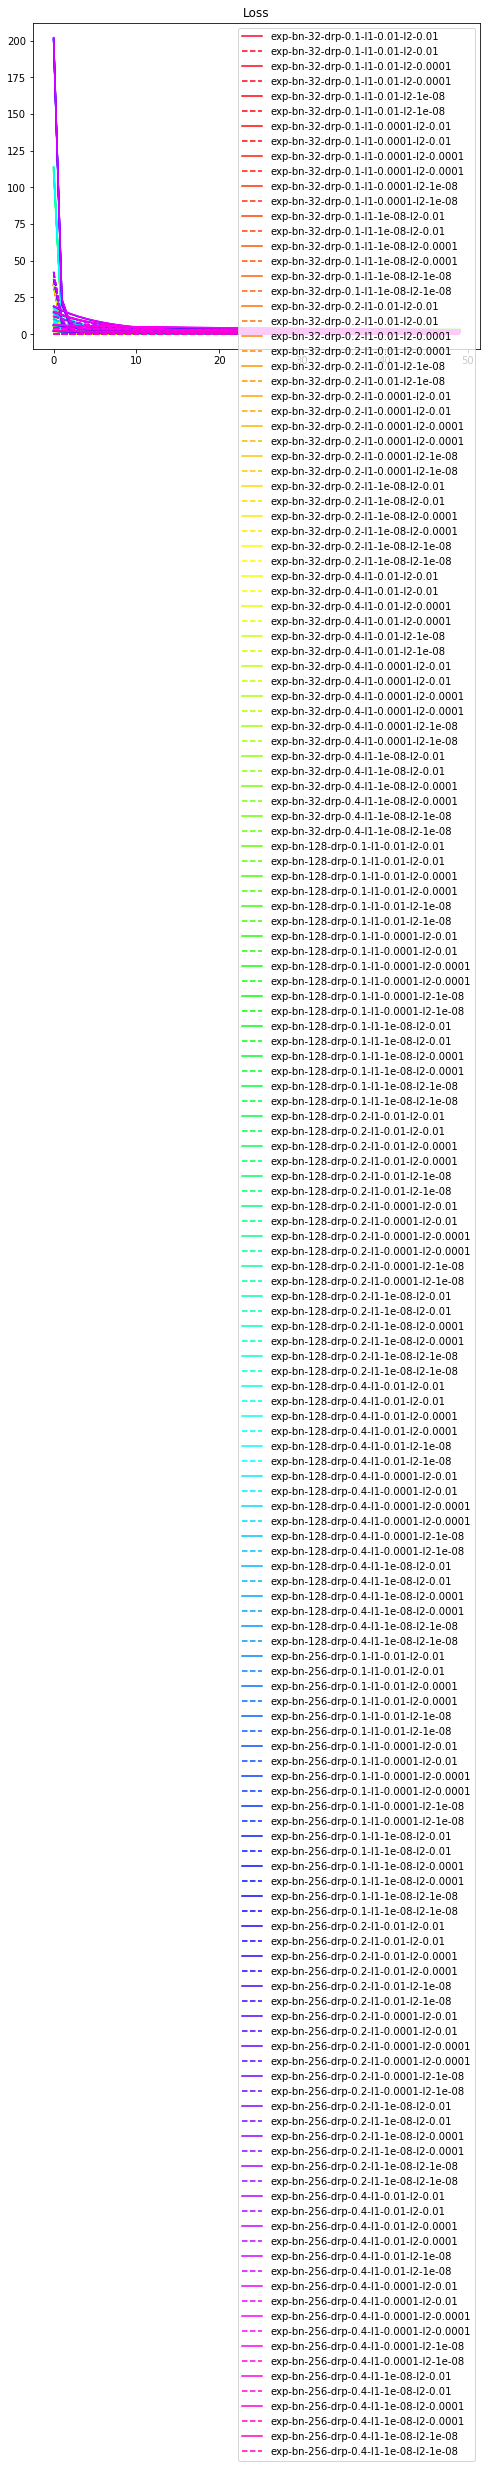

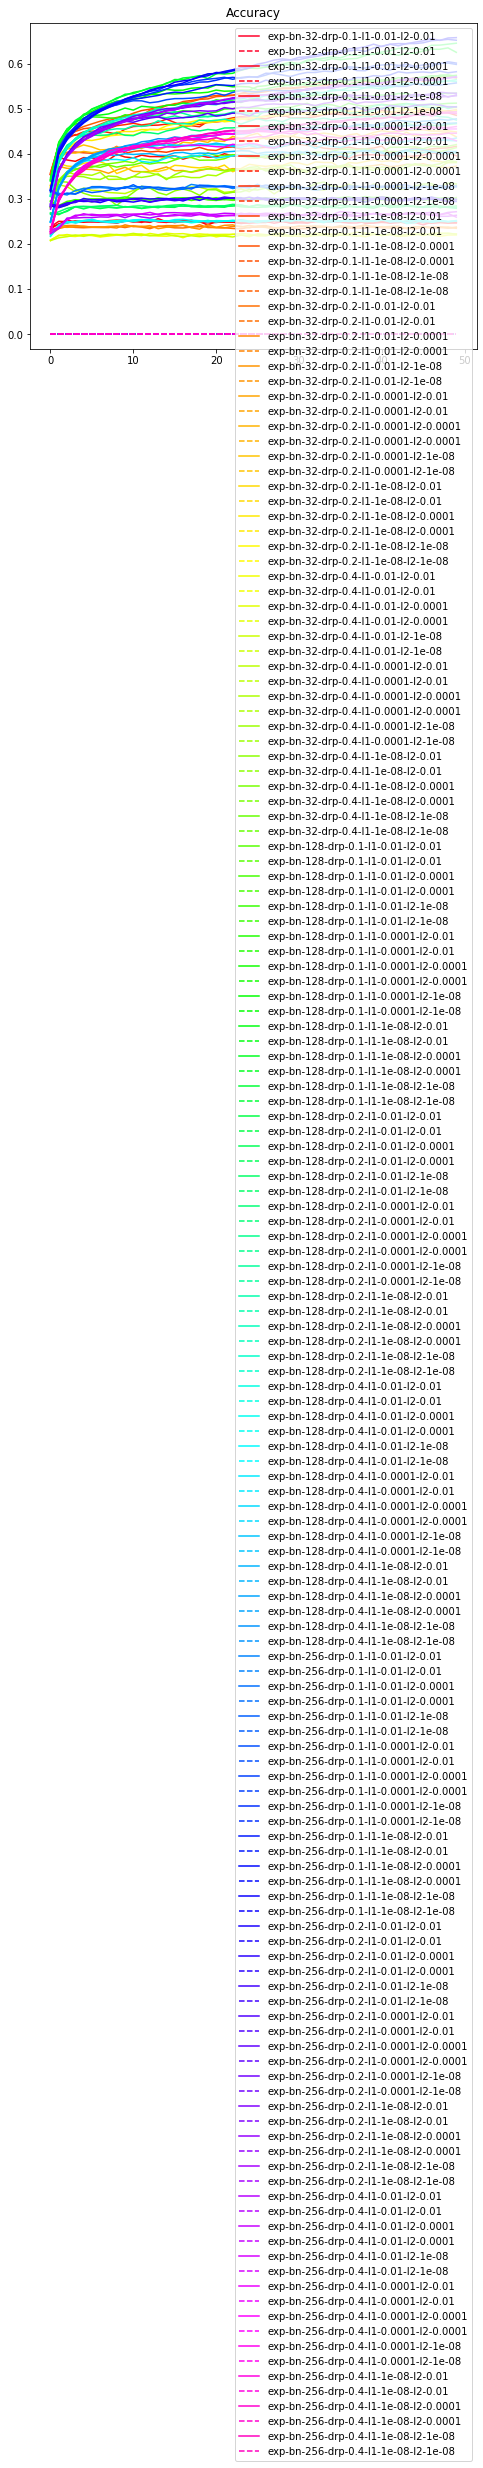

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 81

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()